# Predicting if a patient will have a stroke or not 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
pwd

'/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week4/sians notebooks'

In [4]:
cd ..

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week4


In [5]:
cd ..

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials


In [6]:
df=pd.read_csv('Week1/CaseStudies_Data/Healthcare/strokes_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# EDA, clean and pre process data 

#### EDA / identify problems and fix these - with LOG REG 
- drop duplicates                       df.drop_duplicates() 
- replace nulls                         df.replace(np.nan,'x') or remove or estimate
- encode strings as numbers             pd.get_dummies() on df_cat
- (optional) scale numeric variables 
- remove ID so we dont overfit 

In [8]:
df=df.drop_duplicates()

In [9]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [10]:
y=df['stroke']

In [11]:
X=df.drop('stroke',axis=1)

## stop using 'df' 

In [12]:
X=X.drop(['id'],axis=1)

In [13]:
#null check 
null_bmi=X[X['bmi'].isna()]

In [14]:
X_cat=X.select_dtypes(include=['object'])

In [15]:
X_cat_enc=pd.get_dummies(X_cat,drop_first=True)

In [16]:
X_cat_enc.columns

Index(['gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [17]:
X_cat_enc.shape

(43400, 10)

In [18]:
X_num=X.select_dtypes(exclude=['object'])

In [19]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 43399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43400 non-null  float64
 1   hypertension       43400 non-null  int64  
 2   heart_disease      43400 non-null  int64  
 3   avg_glucose_level  43400 non-null  float64
 4   bmi                41938 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.0 MB


In [20]:
X_cat=X_cat.replace(np.nan,'unknown')

In [21]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 43399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          43400 non-null  object
 1   ever_married    43400 non-null  object
 2   work_type       43400 non-null  object
 3   Residence_type  43400 non-null  object
 4   smoking_status  43400 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [22]:
X_num['bmi']=X_num['bmi'].fillna(0)

In [23]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 43399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43400 non-null  float64
 1   hypertension       43400 non-null  int64  
 2   heart_disease      43400 non-null  int64  
 3   avg_glucose_level  43400 non-null  float64
 4   bmi                43400 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.0 MB


In [24]:
X_num.shape

(43400, 5)

In [25]:
X_full=pd.concat([X_cat_enc,X_num],axis=1)

In [26]:
X_full.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,0,0,0,0,0,1,0,0,0,3.0,0,0,95.12,18.0
1,1,0,1,0,1,0,0,1,1,0,58.0,1,0,87.96,39.2
2,0,0,0,0,1,0,0,1,0,0,8.0,0,0,110.89,17.6
3,0,0,1,0,1,0,0,0,0,0,70.0,0,0,69.04,35.9
4,1,0,0,1,0,0,0,0,0,0,14.0,0,0,161.28,19.1


# Build model candidate_1 

#### get your log regression model
##### fit it to your data 
define X define y , train_test_split(), model.fit()

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg=LogisticRegression() # set up

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=40)

In [31]:
clf=logreg.fit(X_train,y_train)

# Evaluate model candidate_1

#### evaluate model 
- confusion matrix 
- accuracy score 

In [32]:
y_pred=clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [34]:
accuracy_score(y_test,y_pred)

0.9817204301075269

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

In [36]:
import matplotlib.pyplot as plt

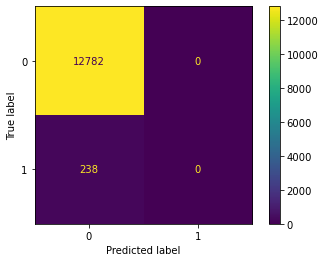

In [37]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [38]:
cmx=confusion_matrix(y_test,y_pred)

In [39]:
import seaborn as sns 

<AxesSubplot:>

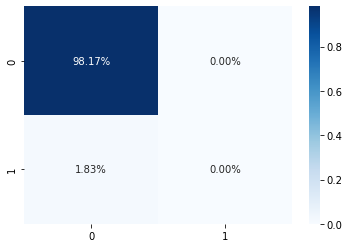

In [40]:
sns.heatmap(cmx/np.sum(cmx),annot=True, fmt='.2%',cmap='Blues')

## candidate 2 - apply tomek links 

In [41]:
from imblearn.under_sampling import TomekLinks

apply sampling method on X 
(after dropping dupes, splitting into num, cat, encoding etc)

In [42]:
tomek=TomekLinks()

In [43]:
X_tl,y_tl=tomek.fit_resample(X_full,y)

In [44]:
y.shape

(43400,)

In [45]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [46]:
y_tl.shape

(43024,)

In [47]:
X_tl.shape

(43024, 15)

In [48]:
y_tl.value_counts()

0    42241
1      783
Name: stroke, dtype: int64

In [49]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [50]:
clf_tl=logreg.fit(X_train_tl,y_train_tl)

In [51]:
y_pred_tl=clf_tl.predict(X_test_tl)

In [52]:
accuracy_score(y_test_tl,y_pred_tl)

0.9835760768515649

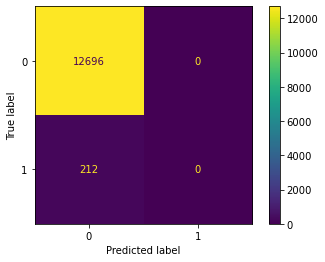

In [53]:
cm = confusion_matrix(y_test_tl, y_pred_tl, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

## Candidate 3 - Undersample majority class  

- if we used Random_Sampler() can we get better at recognising strokes ? 